# Lab 4
## More Data Scraping and EDA

In this lab, you will improve your skills in scraping data from web pages, organizing the data in a desired format, and performing EDA.

For this lab, we are reusing code from Harvard's CS109: https://github.com/cs109/2015/blob/master/Lectures/02-DataScrapingQuizzes.ipynb

## Lab3.A. Run code for scraping Indeed.com data

You firs task will be to exectute the following blocks of code and try to understand what is happening after each line of the code. You will have to answer several questions to show your understanding.

Let us start with importing of the relevant packages.

In [1]:
import requests
import bs4 #this is beautiful soup

import time
from pandas import Series
import pandas as pd
from pandas import DataFrame
import numpy as np
import re

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

As you see, you imported the package called `re`, which supports regular expression operations. You have already used the other packages. 

The following block will access and load the contents of an Indeed.com web page. It will probably give you a warning -- please ignore it.

In [2]:
# Fixed url for job postings containing data scientist
url = 'http://www.indeed.com/jobs?q=data+scientist&l='
# read the website
source = requests.get(url).text
# parse html code
bs_tree = bs4.BeautifulSoup(source)

In [3]:
#bs_tree

**Question 1**:
 * What kind of page did you land on? Explain in a few sentences what is the content of this page.
 * What does the "?" and "&" in the url mean?
 * Explore the content of the web page. If you are using Firefox, open the page Inspector to understand how the underlying html code relates to the displayed content.
 * What pieces of the html code are responsible for showing the job title, company name, and job location?
 
The following block of code will figure out how many job ads are there for jobs that contain "data scientist' in the job title.

In [4]:
print("1. The page that I land on was a job posting page for companies that are looking to hire data scientists")
print("2. The question mark represents a query that passes in a value to a parameter ( key-value ), which in this case passes data scientist into q")
print("2b. The ampersand represents another (key-value) pair for the query")
print("3. The body is responsible for displaying location, job title and company name.")

1. The page that I land on was a job posting page for companies that are looking to hire data scientists
2. The question mark represents a query that passes in a value to a parameter ( key-value ), which in this case passes data scientist into q
2b. The ampersand represents another (key-value) pair for the query
3. The body is responsible for displaying location, job title and company name.


In [5]:
# see how many job postings we found
job_count_string = bs_tree.find(id = 'searchCount').contents[0]
job_count_string = job_count_string.split()[-2]
# find_all and find() is different, find() returns the first occurence

print("Search yielded %s hits." % (job_count_string))

# now that job_count so far is still a string, 
# not an integer, and the , separator prevents 
# us from just casting it to int

job_count_digits = [int(d) for d in job_count_string if d.isdigit()]
job_count = np.sum([digit*(10**exponent) for digit, exponent in 
                    zip(job_count_digits[::-1], range(len(job_count_digits)))])

print(job_count)

Search yielded 33,542 hits.
33542


**Question 2**:
* What does the "find(id = 'searchCount')" in the first line mean?
* What does the second line do?

**Question 3**: 
* Write a piece of code that finds the Salary Estimate object on the page

The following piece of code allows you to find the links to all the job ads on the page.

In [6]:
#Question 2
print("Question 2a: The find(id=\"SearchCount\") means that from the given BSoup tree, it will return the first element that matches the id of searchCount.")
print()
print("Question 2b: The second line basically returns the 2nd element from the last index of the list, which in this case is 33,691")

#Question 3
salary = bs_tree.find(class_="rbHeader").contents[1]
print()
print("The salary estimate object is", salary) # this prints out the Salary Estimate object on the page
salary = salary.contents
salary = "".join(salary)
salary = salary.strip('\n\t')
print(salary) # this prints out just the string Salary Estimate from the page


Question 2a: The find(id="SearchCount") means that from the given BSoup tree, it will return the first element that matches the id of searchCount.

Question 2b: The second line basically returns the 2nd element from the last index of the list, which in this case is 33,691

The salary estimate object is <span aria-level="3" class="ws_bold" role="heading">
				Salary Estimate</span>
Salary Estimate


In [7]:
# The website is only listing 10 results per page, 
# so we need to scrape them page after page
num_pages = int(np.ceil(job_count/10.0))
import math # you could use this instead of using the numpy library LOL KEKEKEKEKEKE
print(math.ceil(job_count/10.0)) # HEHEHEHEHHEHEHEHHE BOISSSSSSSSSSS

base_url = 'http://www.indeed.com'
job_links = []
for i in range(1): #do range(num_pages) if you want them all
    url = 'http://www.indeed.com/jobs?q=data+scientist&start=' + str(i*10)
    html_page = requests.get(url).text
    bs_tree = bs4.BeautifulSoup(html_page)
    job_postings = bs_tree.findAll('div', attrs={'class':'jobsearch-SerpJobCard'})
    job_ids = [jp.get('data-jk') for jp in job_postings]
    # go after each link   
    for id in job_ids:
        job_links.append(base_url + '/viewjob?jk=' + id)

    time.sleep(1)

print("We found a lot of jobs: ", len(job_links))

3355
We found a lot of jobs:  16


In [8]:
job_links

['http://www.indeed.com/viewjob?jk=d094066d7847bcd4',
 'http://www.indeed.com/viewjob?jk=bd900e0a52047630',
 'http://www.indeed.com/viewjob?jk=94754949a0468a52',
 'http://www.indeed.com/viewjob?jk=347ee881443f895c',
 'http://www.indeed.com/viewjob?jk=c29ec10470153175',
 'http://www.indeed.com/viewjob?jk=1486f8bbb9d68d93',
 'http://www.indeed.com/viewjob?jk=851d784993c4eb81',
 'http://www.indeed.com/viewjob?jk=738fe6188daacd19',
 'http://www.indeed.com/viewjob?jk=b6c6149172fdf5c6',
 'http://www.indeed.com/viewjob?jk=b485521dd0cffb12',
 'http://www.indeed.com/viewjob?jk=08106ff509c9c18b',
 'http://www.indeed.com/viewjob?jk=3732427d3a63339e',
 'http://www.indeed.com/viewjob?jk=71ee734828db70f6',
 'http://www.indeed.com/viewjob?jk=644219870743de0e',
 'http://www.indeed.com/viewjob?jk=43f1727417779980',
 'http://www.indeed.com/viewjob?jk=147327f827ef98a1']

**Question 4**:
* explain why is `url` (first line in the for loop) defined as it is. What page are you landing at when `i = 3`?

* What does command `''bs_tree.findAll('div', attrs={'class':'jobsearch-SerpJobCard'})` do?
* Explain the properties and content of `job_links`

**Question 5**:
* Reuse the code above to find links to the first 200 listed data science jobs

The following piece of code accesses and grabs the content of all ads in the `job_links` and extracts all the human-readable text tokens. Then, it counts on how many pages are words `mapreduce`, `spark`, and `visualization` used. It might take a few seconds to execute.

In [9]:
# Question 4
print("Question 4a: when i is equal to 3, you are landing on the third page where the nth job posting is listed. url is defined as it is because you need to iterate through multiple pages where you only get to see 10 job postings per page. In this example, i = 1 because the for loop only executes once.")
print()
print("Question 4b: The command finds all elements in the page where the conditions are met, which in this case finds all divs who's div attributes contains class=jobsearch-SerpJobCard")
print()
print("Question 4c: The job_links is a python List containing links to the job postings of the first page, which in this case 10 different job postings. The job IDs are clearly visible in the URL. ")
print()

# Question 5
job_links = []
for i in range(14): #do range(num_pages) if you want them all
    url = 'http://www.indeed.com/jobs?q=data+scientist&start=' + str(i*10)
    html_page = requests.get(url).text
    bs_tree = bs4.BeautifulSoup(html_page)
    job_postings = bs_tree.findAll('div', attrs={'class':'jobsearch-SerpJobCard'})
    
    job_ids = [jp.get('data-jk') for jp in job_postings]
    
    # print results per page
    # print(len(job_ids))
    jobsss = 0
    # go after each link   
    for id in job_ids:
        if len(job_links) < 200:
            job_links.append(base_url + '/viewjob?jk=' + id)
            jobsss = id
        else:
            continue


    #I DON'T UNDERSTAND WHY YOU NEED A TIMER() HERE? WHAT IS IT WAITING FOR? AN AJAX CALL TO BE EXECUTED? JS FUNCTION?
    #timer.sleep(1)
    
# each page has ~15 job postings
# to get to the 200th job posting, we need to go to ceil(200/15) = ~13-14th page
# what i've noticed is that the job postings order KEEPS changing, so you might not see the same job posting result if you 
# were to type it out in the URL address bar....
job_links

Question 4a: when i is equal to 3, you are landing on the third page where the nth job posting is listed. url is defined as it is because you need to iterate through multiple pages where you only get to see 10 job postings per page. In this example, i = 1 because the for loop only executes once.

Question 4b: The command finds all elements in the page where the conditions are met, which in this case finds all divs who's div attributes contains class=jobsearch-SerpJobCard

Question 4c: The job_links is a python List containing links to the job postings of the first page, which in this case 10 different job postings. The job IDs are clearly visible in the URL. 



['http://www.indeed.com/viewjob?jk=d094066d7847bcd4',
 'http://www.indeed.com/viewjob?jk=bd900e0a52047630',
 'http://www.indeed.com/viewjob?jk=94754949a0468a52',
 'http://www.indeed.com/viewjob?jk=347ee881443f895c',
 'http://www.indeed.com/viewjob?jk=c29ec10470153175',
 'http://www.indeed.com/viewjob?jk=d38087c54d87e201',
 'http://www.indeed.com/viewjob?jk=08106ff509c9c18b',
 'http://www.indeed.com/viewjob?jk=b485521dd0cffb12',
 'http://www.indeed.com/viewjob?jk=851d784993c4eb81',
 'http://www.indeed.com/viewjob?jk=b6c6149172fdf5c6',
 'http://www.indeed.com/viewjob?jk=738fe6188daacd19',
 'http://www.indeed.com/viewjob?jk=830ec0678568e1ee',
 'http://www.indeed.com/viewjob?jk=644219870743de0e',
 'http://www.indeed.com/viewjob?jk=2acb93c6b7680f30',
 'http://www.indeed.com/viewjob?jk=43f1727417779980',
 'http://www.indeed.com/viewjob?jk=147327f827ef98a1',
 'http://www.indeed.com/viewjob?jk=147327f827ef98a1',
 'http://www.indeed.com/viewjob?jk=bd900e0a52047630',
 'http://www.indeed.com/view

In [10]:
skill_set = {'mapreduce':0, 'spark':0, 'visualization':0}
counter = 0
print(len(job_links))
for link in job_links:
    counter +=1  
    
    try:
        html_page = requests.get(link).text
    except urllib2.HTTPError:
        print("HTTPError:")
        continue
    except urllib2.URLError:
        print("URLError:")
        continue
    except socket.error as error:
        print("Connection closed")
        continue

    html_text = re.sub("[^a-z.+3]"," ", html_page.lower()) # replace all but the listed characters
    for key in skill_set.keys():
        if key in html_text:  
            skill_set[key] +=1
            
    if counter % 5 == 0:
        print(len(job_links) - counter)
        print(skill_set)
            
print(skill_set)

200
195
{'mapreduce': 0, 'spark': 1, 'visualization': 4}
190
{'mapreduce': 1, 'spark': 2, 'visualization': 6}
185
{'mapreduce': 1, 'spark': 2, 'visualization': 6}
180
{'mapreduce': 1, 'spark': 4, 'visualization': 10}
175
{'mapreduce': 1, 'spark': 4, 'visualization': 10}
170
{'mapreduce': 1, 'spark': 7, 'visualization': 12}
165
{'mapreduce': 1, 'spark': 9, 'visualization': 15}
160
{'mapreduce': 1, 'spark': 11, 'visualization': 17}
155
{'mapreduce': 2, 'spark': 13, 'visualization': 17}
150
{'mapreduce': 2, 'spark': 14, 'visualization': 21}
145
{'mapreduce': 2, 'spark': 15, 'visualization': 22}
140
{'mapreduce': 2, 'spark': 17, 'visualization': 25}
135
{'mapreduce': 2, 'spark': 18, 'visualization': 29}
130
{'mapreduce': 2, 'spark': 20, 'visualization': 32}
125
{'mapreduce': 2, 'spark': 20, 'visualization': 33}
120
{'mapreduce': 2, 'spark': 21, 'visualization': 36}
115
{'mapreduce': 2, 'spark': 23, 'visualization': 38}
110
{'mapreduce': 2, 'spark': 23, 'visualization': 40}
105
{'mapreduce'

**Question 6**
* What does the `re.sub()` do in the above code? To answer this, you will have to go to the documentation of the regular expression package (find it on web).
* What is the meaning of `[^a-z.+3]`?
* What is the content of `skill_set`?

The following piece of code plots the counts of different skills in the processed ads.

In [11]:
print("Question 6a: The re.sub() method replaces the given regular expression, which in this case anything but alphabets, with the given string, which in this case is just an empty space")
print()
print("Question 6b: The meaning of [^a-z.+3] is find every character that is not an alphabet.")
print()
print("Question 6c: The content of skill_set is a dictionary that has words as keys and the number of those words as the values of the dictionary.")

Question 6a: The re.sub() method replaces the given regular expression, which in this case anything but alphabets, with the given string, which in this case is just an empty space

Question 6b: The meaning of [^a-z.+3] is find every character that is not an alphabet.

Question 6c: The content of skill_set is a dictionary that has words as keys and the number of those words as the values of the dictionary.


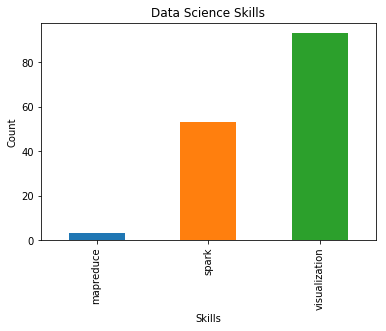

In [12]:
pseries = pd.Series(skill_set)
pseries.sort_values(ascending=False)

pseries.plot(kind = 'bar')
## set the title to Score Comparison
plt.title('Data Science Skills')
## set the x label
plt.xlabel('Skills')
## set the y label
plt.ylabel('Count')
## show the plot
plt.show()

**Question 7**:
- rerun the code to find the counts of the 3 data science skills on the first 200 job ads

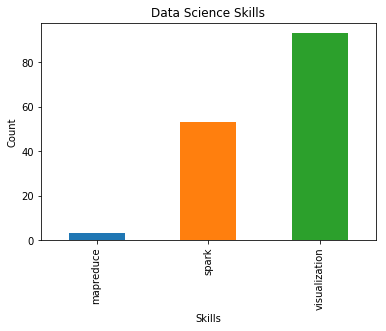

In [13]:
# Question 7 
pseries = pd.Series(skill_set)
pseries.sort_values(ascending=False)

pseries.plot(kind = 'bar')
## set the title to Score Comparison
plt.title('Data Science Skills')
## set the x label
plt.xlabel('Skills')
## set the y label
plt.ylabel('Count')
## show the plot
plt.show()

## Lab 3.B: Data analysis of job skills
In the first part of the lab, you created `skill_set` dictionary that counts occurences of 3 important data science skills. In this part of the lab we are asking you to create pandas `DataFrame` object as a table whose rows correspond to individual ads and columns correspond to important information about the ads and skills mentioned on those pages. Let us call the table `job_ads`. Process the first 1,000 data science ads, so your table should have 1,000 rows. For each ad, you will have to create the following columns:
- job title
- company name
- job location
- skill 1
- skill 2
- ...
- skill 20

Job title, company name, and job locations will be readable from the Indeed.com page. We are asking you to list 20 skills, instead of only 3 in the code above ('mapreduce', 'spark', 'visualization'). You will need to find another 17 words that are commonly used in data science job ads. To do it, please explore the content of at least 10 ads.

Once you creat your `job_ads` table, please preform EDA of the table, in a similar way you did in Lab 2: provide code and a 2-page document that summarizes interesitng insights about the first 1,000 data science jobs.

**Deliverables**:
- the modified Lab 4 .ipynb file that contains all the answers to the questions
- a 2-page documents presenting the results of your EDA of the `job_ads` data

In [14]:
# 17 different skills
skill_set['hadoop'] = []
skill_set['analytics'] = []
skill_set['mining'] = []
skill_set['presentation'] = []
skill_set['dashboards'] = []
skill_set['statistics'] = []
skill_set['collaborate'] = []
skill_set['testing'] = []
skill_set['research'] = []
skill_set['algorithms'] = []
skill_set['python'] = []
skill_set['communication'] = []
skill_set['excel'] = []
skill_set['Java'] = []
skill_set['machine learning'] = []
skill_set['regression'] = []
skill_set['matlab'] = []
skill_set['spark'] = []
skill_set['visualization'] = []
skill_set['mapreduce'] = []
d = {'job title': [], 'company name': [], 'job location': []}

# concatenates the two dictionaries
d = {**d, **skill_set}

#df = pd.DataFrame(data=d)


# code to execute the web scraping for job title, company name, location and the 20 job skills.
job_links = []
jobids = []
for i in range(67): #do range(num_pages) if you want them all
    url = 'http://www.indeed.com/jobs?q=data+scientist&start=' + str(i*10)
    html_page = requests.get(url).text
    bs_tree = bs4.BeautifulSoup(html_page)
    job_postings = bs_tree.findAll('div', attrs={'class':'jobsearch-SerpJobCard'})
    
    job_ids = [jp.get('data-jk') for jp in job_postings]
    
    # print results per page
    # print(len(job_ids))
    jobsss = 0
    # go after each link   
    for id in job_ids:
        if len(job_links) < 1000:
            job_links.append(base_url + '/viewjob?jk=' + id)
            jobsss = id
            jobids.append(id)
        else:
            continue
         
count = 0
for id in jobids: #do range(num_pages) if you want them all
    url = 'https://www.indeed.com/viewjob?jk=' + id
    print("Execution stage......", count,"/1000")
    count += 1
    html_page = requests.get(url).text
    bs_tree = bs4.BeautifulSoup(html_page)

    job_locations = bs_tree.findAll('div', attrs={'class':'jobsearch-InlineCompanyRating'})
    # determines the location of the job listing
    location = job_locations[0].findAll('div')[-1].get_text()
    
    # determines the job title from the job listing
    job_titles = bs_tree.findAll('div', attrs={'class': 'jobsearch-DesktopStickyContainer'})
    titles = job_titles[0].findAll('h3')[0].get_text()
    
    # determines the company name from the job listing
    company_names = bs_tree.findAll('div', attrs={'class':'jobsearch-InlineCompanyRating'})
    name = company_names[0].findAll('div')[0].get_text()
    
    # append the company name, location and title to the dictionary
    d['job title'].append(titles)
    d['job location'].append(location)
    d['company name'].append(name)

    # retrieve HTML page
    try:
        html_page = requests.get(url).text
    except urllib2.HTTPError:
        print("HTTPError:")
        continue
    except urllib2.URLError:
        print("URLError:")
        continue
    except socket.error as error:
        print("Connection closed")
        continue
        
    temp = {}
    temp['spark'] = 0
    temp['mapreduce'] = 0
    temp['visualization'] = 0
    temp['hadoop'] = 0
    temp['analytics'] = 0
    temp['mining'] = 0
    temp['presentation'] = 0
    temp['dashboards'] = 0
    temp['statistics'] = 0
    temp['collaborate'] = 0
    temp['testing'] = 0
    temp['research'] = 0
    temp['algorithms'] = 0
    temp['python'] = 0
    temp['communication'] = 0
    temp['excel'] = 0
    temp['Java'] = 0
    temp['machine learning'] = 0
    temp['regression'] = 0
    temp['matlab'] = 0           
        
    html_text = re.sub("[^a-z.+3]"," ", html_page.lower()) # replace all but the listed characters
    for key,value in temp.items():
        if key in html_text:  
            temp[key] += 1

    for key, value in temp.items():
        d[key].append(value)
    

    
#    skill_set[key].append()

    # print results per page
    # print(len(job_ids))
d = pd.DataFrame(data=d)
job_ads = d








Execution stage...... 0 /1000
Execution stage...... 1 /1000
Execution stage...... 2 /1000
Execution stage...... 3 /1000
Execution stage...... 4 /1000
Execution stage...... 5 /1000
Execution stage...... 6 /1000
Execution stage...... 7 /1000
Execution stage...... 8 /1000
Execution stage...... 9 /1000
Execution stage...... 10 /1000
Execution stage...... 11 /1000
Execution stage...... 12 /1000
Execution stage...... 13 /1000
Execution stage...... 14 /1000
Execution stage...... 15 /1000
Execution stage...... 16 /1000
Execution stage...... 17 /1000
Execution stage...... 18 /1000
Execution stage...... 19 /1000
Execution stage...... 20 /1000
Execution stage...... 21 /1000
Execution stage...... 22 /1000
Execution stage...... 23 /1000
Execution stage...... 24 /1000
Execution stage...... 25 /1000
Execution stage...... 26 /1000
Execution stage...... 27 /1000
Execution stage...... 28 /1000
Execution stage...... 29 /1000
Execution stage...... 30 /1000
Execution stage...... 31 /1000
Execution stage...

Execution stage...... 260 /1000
Execution stage...... 261 /1000
Execution stage...... 262 /1000
Execution stage...... 263 /1000
Execution stage...... 264 /1000
Execution stage...... 265 /1000
Execution stage...... 266 /1000
Execution stage...... 267 /1000
Execution stage...... 268 /1000
Execution stage...... 269 /1000
Execution stage...... 270 /1000
Execution stage...... 271 /1000
Execution stage...... 272 /1000
Execution stage...... 273 /1000
Execution stage...... 274 /1000
Execution stage...... 275 /1000
Execution stage...... 276 /1000
Execution stage...... 277 /1000
Execution stage...... 278 /1000
Execution stage...... 279 /1000
Execution stage...... 280 /1000
Execution stage...... 281 /1000
Execution stage...... 282 /1000
Execution stage...... 283 /1000
Execution stage...... 284 /1000
Execution stage...... 285 /1000
Execution stage...... 286 /1000
Execution stage...... 287 /1000
Execution stage...... 288 /1000
Execution stage...... 289 /1000
Execution stage...... 290 /1000
Executio

Execution stage...... 517 /1000
Execution stage...... 518 /1000
Execution stage...... 519 /1000
Execution stage...... 520 /1000
Execution stage...... 521 /1000
Execution stage...... 522 /1000
Execution stage...... 523 /1000
Execution stage...... 524 /1000
Execution stage...... 525 /1000
Execution stage...... 526 /1000
Execution stage...... 527 /1000
Execution stage...... 528 /1000
Execution stage...... 529 /1000
Execution stage...... 530 /1000
Execution stage...... 531 /1000
Execution stage...... 532 /1000
Execution stage...... 533 /1000
Execution stage...... 534 /1000
Execution stage...... 535 /1000
Execution stage...... 536 /1000
Execution stage...... 537 /1000
Execution stage...... 538 /1000
Execution stage...... 539 /1000
Execution stage...... 540 /1000
Execution stage...... 541 /1000
Execution stage...... 542 /1000
Execution stage...... 543 /1000
Execution stage...... 544 /1000
Execution stage...... 545 /1000
Execution stage...... 546 /1000
Execution stage...... 547 /1000
Executio

Execution stage...... 774 /1000
Execution stage...... 775 /1000
Execution stage...... 776 /1000
Execution stage...... 777 /1000
Execution stage...... 778 /1000
Execution stage...... 779 /1000
Execution stage...... 780 /1000
Execution stage...... 781 /1000
Execution stage...... 782 /1000
Execution stage...... 783 /1000
Execution stage...... 784 /1000
Execution stage...... 785 /1000
Execution stage...... 786 /1000
Execution stage...... 787 /1000
Execution stage...... 788 /1000
Execution stage...... 789 /1000
Execution stage...... 790 /1000
Execution stage...... 791 /1000
Execution stage...... 792 /1000
Execution stage...... 793 /1000
Execution stage...... 794 /1000
Execution stage...... 795 /1000
Execution stage...... 796 /1000
Execution stage...... 797 /1000
Execution stage...... 798 /1000
Execution stage...... 799 /1000
Execution stage...... 800 /1000
Execution stage...... 801 /1000
Execution stage...... 802 /1000
Execution stage...... 803 /1000
Execution stage...... 804 /1000
Executio

Text(0.5, 1.0, 'Number of Data Scientist Job Postings per State')

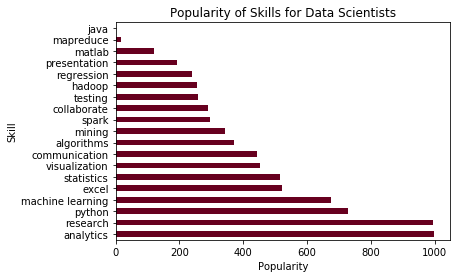

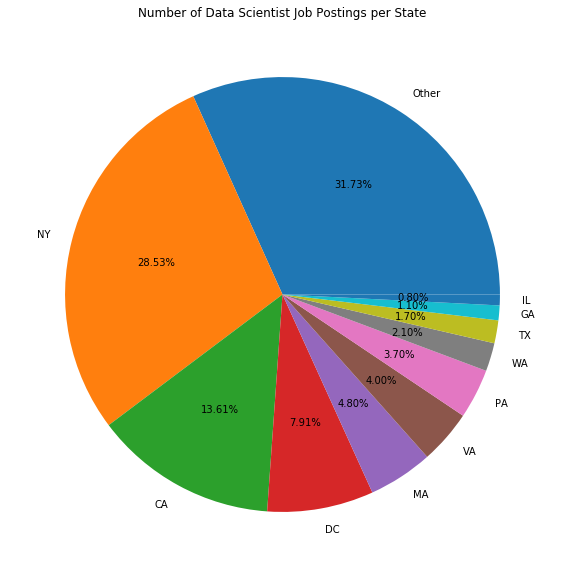

In [68]:
#plt.figure(figsize=(10,4))
l = []

a = sum(job_ads['mapreduce'] == 1) 
b = sum(job_ads['spark'] == 1)
c = sum(job_ads['visualization'] == 1) 
d = sum(job_ads['Java'] == 1) 
e = sum(job_ads['python'] == 1) 
f = sum(job_ads['communication'] == 1) 
g = sum(job_ads['collaborate'] == 1) 
h = sum(job_ads['machine learning'] == 1) 
i = sum(job_ads['research'] == 1) 
j = sum(job_ads['analytics'] == 1) 
k = sum(job_ads['testing'] == 1) 
l = sum(job_ads['algorithms'] == 1) 
m = sum(job_ads['regression'] == 1) 
n = sum(job_ads['matlab'] == 1) 
o = sum(job_ads['excel'] == 1) 
p = sum(job_ads['hadoop'] == 1) 
q = sum(job_ads['mining'] == 1) 
r = sum(job_ads['dashboards'] == 1) 
s = sum(job_ads['statistics'] == 1) 
t = sum(job_ads['presentation'] == 1) 

job_ads

# basically maps a new dictionary where it counts how many jobs require a particular skill

skills = {'mapreduce':a, 'spark':b, 'visualization':c, 'machine learning':h,
             'statistics':s, 'java':d,
             'communication':f, 'analytics':j,
             'testing':k, 'algorithms':l,
             'matlab':n, 'mining':q,
             'hadoop':p, 'python':e, 'regression':m,
             'excel':o, 'presentation':t, 
             'mining':q, 'research':i,
             'collaborate':g}
    
s = pd.Series(skills)
s = pd.Series.sort_values(s, ascending=False)
s.plot.barh(colormap='RdBu')
plt.xlabel("Popularity")
plt.ylabel("Skill")
plt.title("Popularity of Skills for Data Scientists")

locations = job_ads['job location']
states = ['NY','WA','CA','MA','IL','DC','TX','NM','GA','PA','MO','VA']
subtract_states = 0

for i in range(0,12):
    subtract_states += locations.str.contains(states[i]).sum()

other = 1000 - subtract_states 
loc_dict = {'NY':ny, 'WA':wa, 'CA':ca, 'MA':ma, 'IL':il, 'DC':dc, 'TX':tx,
            'GA':ga, 'PA':pa, 'VA':va, 'Other':other}

l = pd.Series(loc_dict)
l = pd.Series.sort_values(l, ascending=False)

plt.figure(figsize=(20,10))
l.plot.pie(autopct='%.2f%%')
plt.ylabel("")
plt.title("Number of Data Scientist Job Postings per State")